Title: Predicting Chest Pain Type Based on Resting Blood Pressure and Cholesterol Level in Patients at Risk of Heart Disease.


Introduction:
A new prediction model, using test results from the Cleveland Clink in Ohio predicted the diagnoses of heart disease based on numeric, integer and categorical variables. This model was then applied to a new group of 425 patients who were going through the process of angiography, which is the examination of blood vessels via X ray. We will repurpose the dataset used in this paper. 


In this project, we inquire whether we can use classification to predict the Chest Pain Type (cp) an individual could suffer from based on Resting Blood Pressure (trestbps) and Serum Cholesterol in mg/dl (chol). The chest pain types include: (value 1: typical angina, value 2: atypical angina, value 3: non-anginal pain, value 4: asymptomatic). Angina (chest pain) is a primary indicator of heart disease and the types of pain experienced can be used to diagnose and assess the severity of the condition (Nakias et al., 2018).


As high levels of cholesterol and irregular resting blood correlate with atypical angina (Mosby, 2004), we are curious if these variables can predict the kinds of chest pain patients have. Predicting chest pain type can benefit individuals at risk of heart disease as healthcare providers can identify what symptoms a patient should be monitoring for to get crucial care faster. 


Methods:


We will be making a model for classification data analysis which can determine the categorical label “type of heart pain patients have” based on their “resting blood pressure” and “cholesterol”. We will be keeping the columns cp (chest pain type), resting blood pressure (resting blood pressure), and cholesterol (chol) (serum cholesterol in mg/dl). 


Our classification model will produced using tidymodels, data will be split in an 80:20 ratio to form training and testing sets of data. Variables will be standardized. We will evaluate our model using the “metrics” function. One visualization we will do is to plot accuracy vs. k to demonstrate our chosen k is close to optimal for the nearest neighbours function. 




Expected outcomes and significance:


What do you expect to find? 
We expect to be able to predict and classify the type of chest pain a patient is experiencing as typical angina, atypical angina, non-anginal pain, or asymptomatic based only on the numerical categories: cholesterol and resting blood pressure. 


What impact could such findings have? 
These findings could have impacts in the area of healthcare. It could be used to classify potential chest pain type based on physical testing (blood test for cholesterol and blood pressure cuff for measuring blood pressure) 


What future questions could this lead to? 
This classification could lead to future questions about how cholesterol levels and resting blood pressure levels are related to chest pain, and, in turn, related to heart disease. It would give healthcare professionals additional information to use in their clinics to better treat patients with chest pain and potentially heart disease.


Citations (APA):


Nakias, N., Bechlioulis, A., & et. al.,. (2018, June 8). The importance of characteristics of angina symptoms for the prediction of coronary artery disease in a cohort of stable patients in the modern era. Hellenic Journal of Cardiology. https://www.sciencedirect.com/science/article/pii/S1109966618300277


Mosby. (2004b, February 27). The relation of the systolic blood pressure and heart rate to attacks of angina pectoris precipitated by effort. American Heart Journal. https://www.sciencedirect.com/science/article/abs/pii/S0002870336908839
839
com/science/article/abs/pii/S0002870336908839


Word Count: 495 excluding works cited

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

We begin by reading the heart disease csv file into R from the web. 

In [2]:
url <- "https://raw.githubusercontent.com/Ellaj1/Group-31/main/processed.cleveland.data"
heart_disease <- read_csv(url, col_names = FALSE) 
colnames(heart_disease) <- c("age", "sex", "cp", "trestbps", "chol",
                         "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_disease$sex <- as.factor(heart_disease$sex)
heart_disease$cp <- as.factor(heart_disease$cp)
heart_disease$fbs <- as.factor(heart_disease$fbs)
heart_disease$restecg <- as.factor(heart_disease$restecg)
heart_disease$exang <- as.factor(heart_disease$exang)
heart_disease$slope <- as.factor(heart_disease$slope)
heart_disease$thal <- as.factor(heart_disease$thal)
heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


Next, we select the columns that we're interested in. In this case, these columns include resting heart rate, cholesterol and chest pain type. 

In [3]:
heart_disease_select <- heart_disease|>
select(trestbps,chol,cp)
heart_disease_select

trestbps,chol,cp
<dbl>,<dbl>,<fct>
145,233,1
160,286,4
120,229,4
130,250,3
130,204,2
120,236,2
140,268,4
120,354,4
130,254,4


We must set the seed so that our work is reproducible. Then, we split the data into our training and testing sets. 

In [4]:
set.seed(3456)

heart_disease_split <- initial_split(heart_disease_select, prop=0.75, strata=cp)
heart_disease_train<- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)
heart_disease_train
heart_disease_test

trestbps,chol,cp
<dbl>,<dbl>,<fct>
130,204,2
120,236,2
120,263,2
120,284,2
150,226,1
140,239,1
160,302,2
105,198,2
130,219,2


trestbps,chol,cp
<dbl>,<dbl>,<fct>
160,286,4
140,203,4
140,192,4
140,294,2
172,199,3
150,168,3
110,229,2
140,239,4
130,266,2


We make a summary statistic, grouping by chest pain type and finding the average of both the resting heart rate and of the cholesterol level. 

In [5]:
heart_disease_tidy <- heart_disease_train |>
group_by(cp)|>
summarize(mean_trestbps = mean(trestbps, na.rm=TRUE), mean_chol = mean(chol, na.rm=TRUE))
heart_disease_tidy

cp,mean_trestbps,mean_chol
<fct>,<dbl>,<dbl>
1,142.2778,237.6111
2,129.6579,248.7105
3,129.7969,244.6719
4,131.6542,252.0654


Finally we create an initial visualization of resting blood pressure vs cholesterol levels, using colour and shape to categorize chest pain type. 

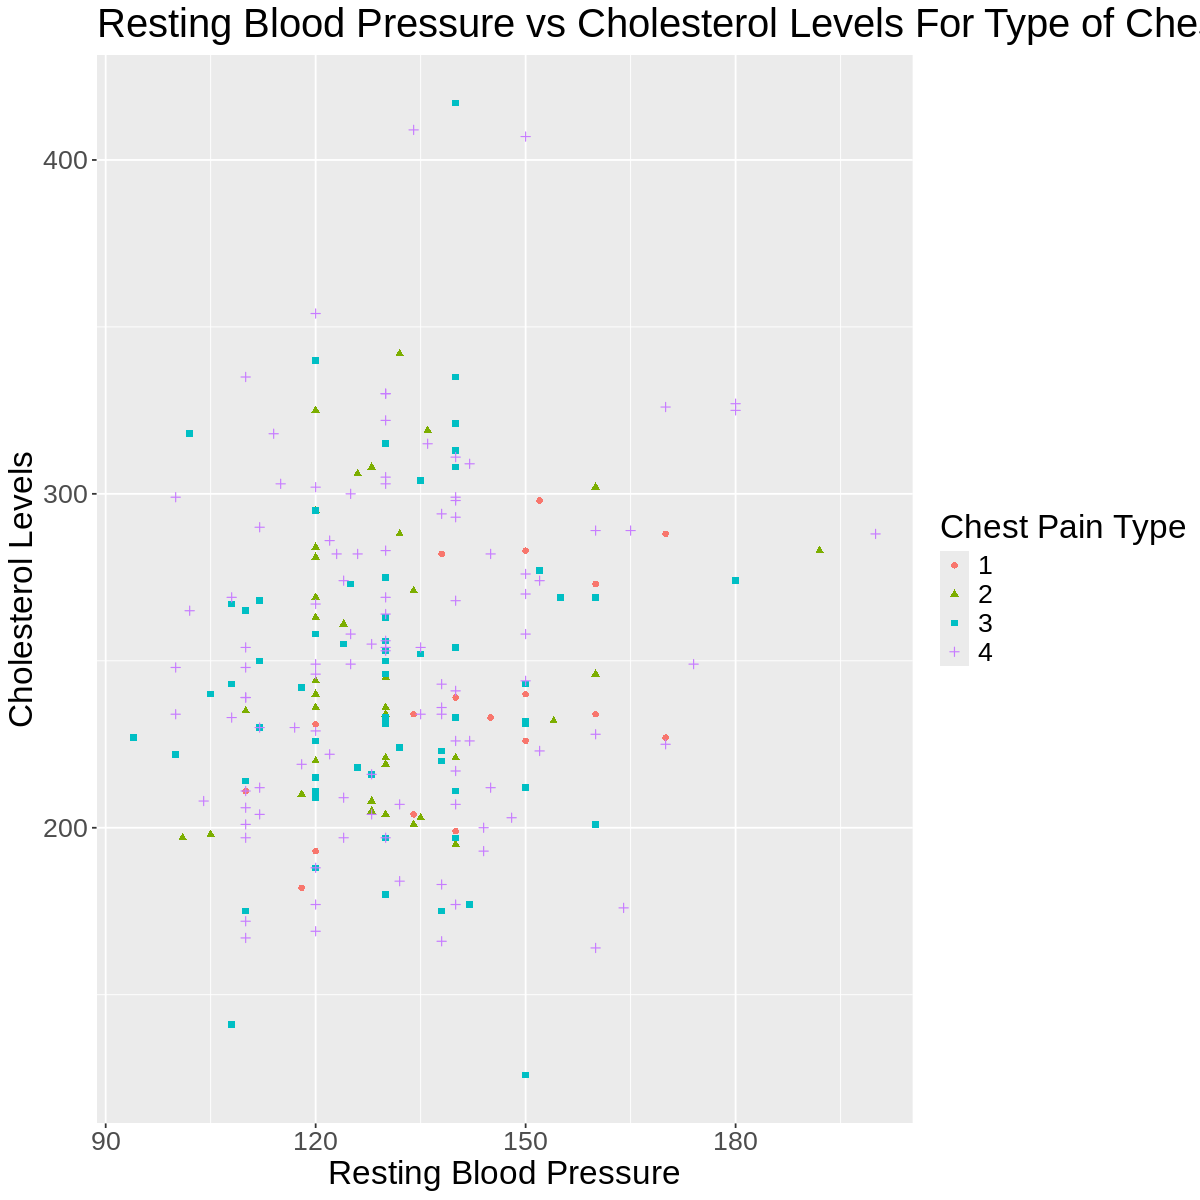

In [6]:
options(repr.plot.height=10, repr.plot.width=10)
Visualization <- heart_disease_train|>
ggplot(aes(x= trestbps, y= chol))+
       geom_point(aes(colour = cp, shape = cp)) +
labs(x = "Resting Blood Pressure", y = "Cholesterol Levels", colour = "Chest Pain Type", shape = "Chest Pain Type") +
ggtitle("Resting Blood Pressure vs Cholesterol Levels For Type of Chest Pain")+
  theme(text = element_text(size = 20))
Visualization

→ A | warning: No observations were detected in `truth` for level(s): '1'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





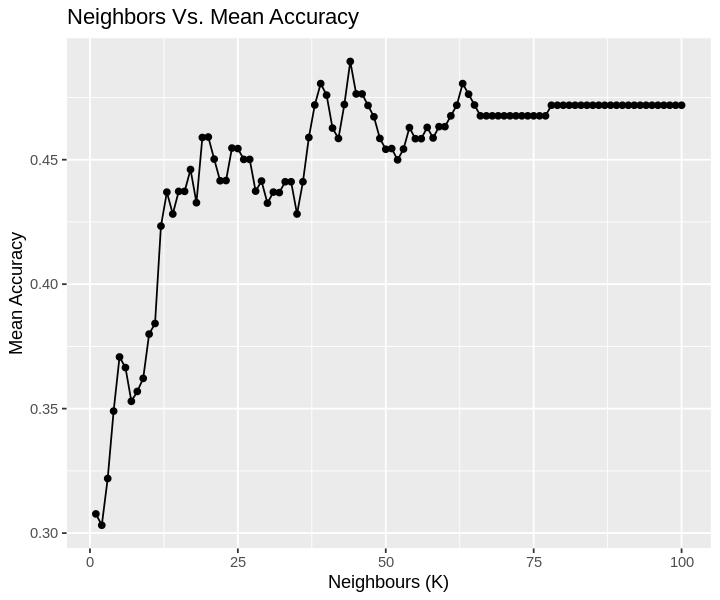

In [7]:
options(repr.plot.height = 5, repr.plot.width = 6)

vfold <- vfold_cv(heart_disease_train, v=5, strata = cp)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
set_engine("kknn")|>
set_mode("classification")

recipe_knn <- recipe(cp~., data=heart_disease_train)

values <- tibble(neighbors=seq(from=1, to=100, by=1))

knn_fit <- workflow()|>
add_recipe(recipe_knn)|>
add_model(knn_tune)|>
tune_grid(resamples=vfold, grid = values)|>
collect_metrics()|>
filter(.metric == "accuracy")

cross_val_plot <- knn_fit|>
ggplot(aes(x=neighbors, y=mean))+
geom_point()+
geom_line()+
labs(x="Neighbours (K)", y="Mean Accuracy", title = "Neighbors Vs. Mean Accuracy")

cross_val_plot

In [ ]:
Above is our plot to help us choose a K value for our classification.